<a href="https://colab.research.google.com/github/raguram/eva/blob/master/S12/TemplateIdentifiaction_Assignment12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Identify templates from annotated images. 

I used vgg annotation tool for annotating 50 images of dog. http://www.robots.ox.ac.uk/~vgg/software/via/via_demo.html. I downloaded the annotations in Coco format. 

The Coco format has the following schema. 

<pre>
{
    "info": {...}, # Contains information about annotations 
    "images": [...], # Contains details about the images 
    "annotations": [...], # Contains the annotations for bounding box
    "categories": [...] # Contains the category/class of the images in boundingbox
}
</pre>

### Example

Info is the basic information about the annotations.

<pre>
"info": {
    "year": 2020,
    "version": "1",
    "description": "Exported using VGG Image Annotator (http://www.robots.ox.ac.uk/~vgg/software/via/)",
    "contributor": "",
    "url": "http://www.robots.ox.ac.uk/~vgg/software/via/",
    "date_created": "Sat Apr 25 2020 01:38:58 GMT+0530 (India Standard Time)"
  }
</pre> 

Images is an array of details about each of the images annotated. 

<pre>
"images": [ 
    {
      "id": 0, # uniqe Id for the image 
      "width": 500, # width of the image 
      "height": 332, # Height of the image 
      "file_name": "pexels-photo-1189673.jpeg", # Image file name 
      "license": 1, 
      "date_captured": ""
    }
]
</pre>

Annotations contain the details of the bounding box. 

<pre> 
 "annotations": [
    {
      "id": 0, # Unique id assigned for each annotation 
      "image_id": "0", # References the images.id 
      "category_id": 1, # Represents which category this belows to. 
      "segmentation": [ # Pixel (x,y) positions of corners of the rectangle of the bounding box. 
        115, 
        4,
        436,
        4,
        436,
        332,
        115,
        332
      ],
      "area": 105288, # Area of the bounding box rectangle. 
      "bbox": [ # [x, y, w, h] -> (x, y) is Top left pixel of the rectangular bounding box and (w, h) is the width and height of the bounding box. 
        115,
        4,
        321,
        328
      ],
      "iscrowd": 0 # Indicates if the segmentation is for a single object or for a group of objects.
    }
 ]
</pre> 

Categories indicates the class. 

<pre>
"categories": [
    {
      "id": 1, # Identifier for the category labels. 
      "name": "dog", # Class name
      "supercategory": "class"
    }
]
</pre>


In [1]:
from os.path import join
import sys
from google.colab import drive

# Mount the drive
ROOT = "/content/drive"
drive.mount(ROOT, force_remount=True)

LIBRARY_ROOT = "/content/drive/My Drive/Colab Notebooks/workspace/eva/cnn-lib/src"
sys.path.append(LIBRARY_ROOT)
sys.path.append(LIBRARY_ROOT + "/cnnlib")

Mounted at /content/drive


In [0]:
from Clusterer import TemplateIdentifier

## Fit Template Identifier for the Annotation

In [0]:
templateIdentifier = TemplateIdentifier("/content/drive/My Drive/Colab Notebooks/workspace/eva/cnn-lib/data/annotations.json")
templateIdentifier.fit(20)

## Display the IOU curve 

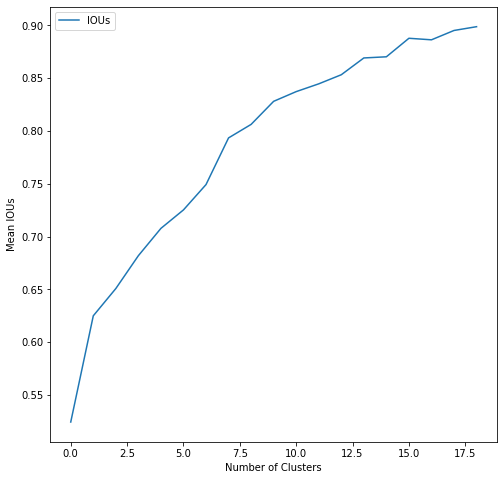

In [5]:
templateIdentifier.show_iou_curve(figsize=(8, 8))

### Plot points and clusters. Circular points indicate annotated points. Triangular points indicate centroids

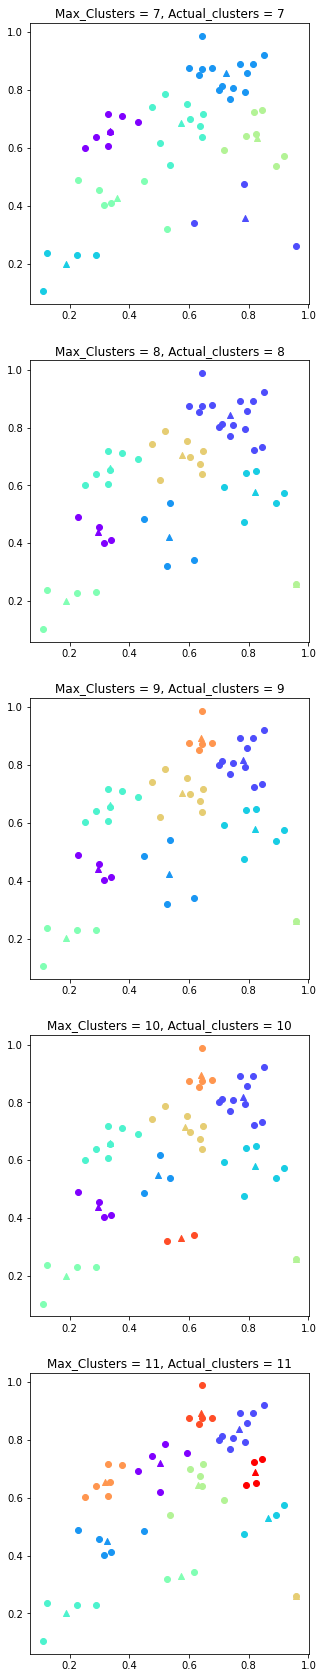

In [10]:
templateIdentifier.show_points_centroids(range(7, 12), figsize=(5, 30))

**9 clusters looks to be good for this case**